<a href="https://colab.research.google.com/github/DoItSon/playdata/blob/main/Python2/11_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# colab 한글 깨짐 방지
- 실행 후 런타임 다시 시작할 것

In [1]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name()
fm._rebuild()

%config InlineBackend.figure_format = 'retina' 

plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.columns = ["꽃받침길이","꽃받침너비","꽃잎길이","꽃잎너비","꽃종류"]
df.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,꽃종류
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   150 non-null    float64
 1   꽃받침너비   150 non-null    float64
 2   꽃잎길이    150 non-null    float64
 3   꽃잎너비    150 non-null    float64
 4   꽃종류     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Seaborn
- 내부적으로 Matplotlib을 호출하여 시각화하는 라이브러리

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


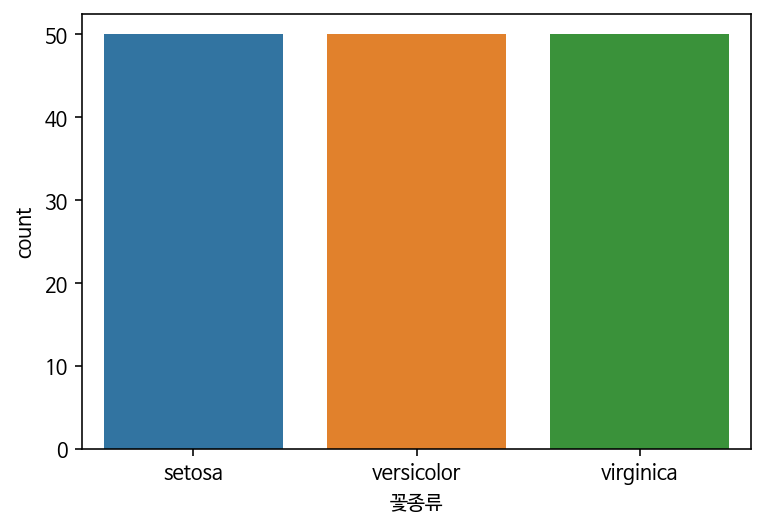

In [8]:
sns.countplot(df["꽃종류"])
plt.show()

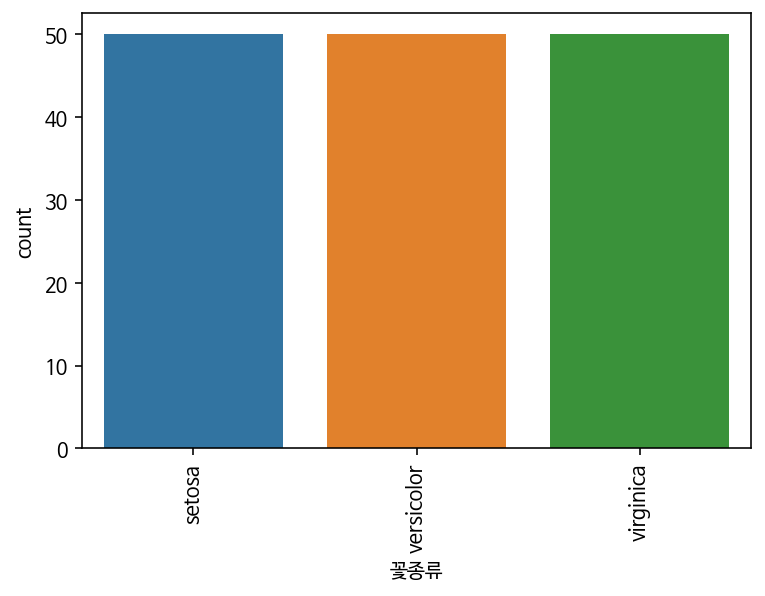

In [11]:
sns.countplot(x = "꽃종류",data=df).tick_params(axis="x",labelrotation=90)
plt.show()

# seaborn 그래프 종류
- Relational plots
    - 두 변수의 관계를 볼 때
- Distribution plots
    - 변수의 데이터에 분포를 볼 때
- Categorical plots
    - 범주형 변수의 집계나 범주형 변수와 수치형 변수간에 관계를 볼 때

## Relational plots

- line plot

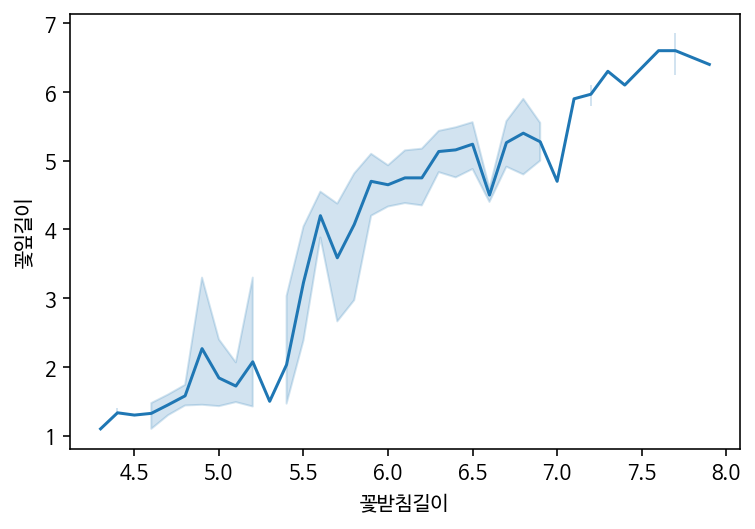

In [12]:
sns.lineplot(x = "꽃받침길이", y = "꽃잎길이", data=df)
plt.show()

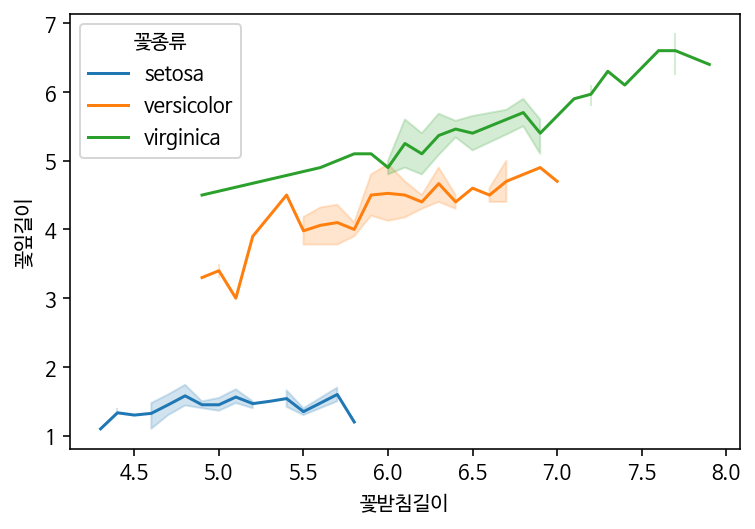

In [14]:
sns.lineplot(x="꽃받침길이",y="꽃잎길이",hue="꽃종류",data=df) # hue = groupby같은 개념
plt.show()

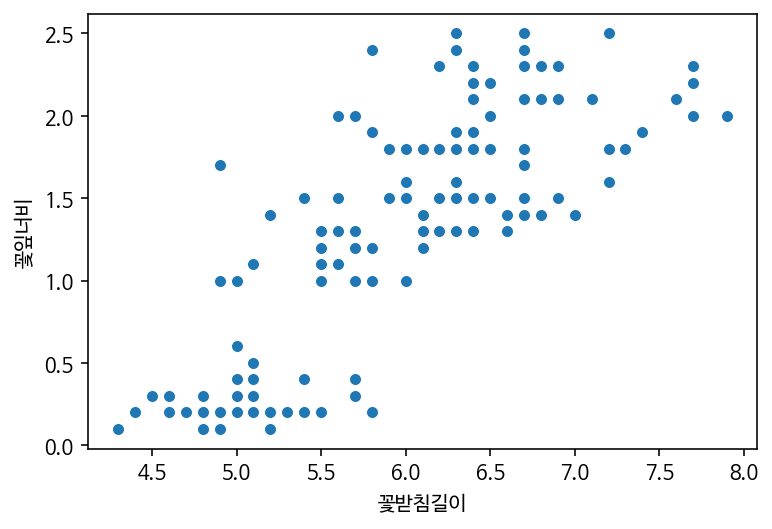

In [18]:
sns.scatterplot(x="꽃받침길이",y="꽃잎너비",data=df)
plt.show()

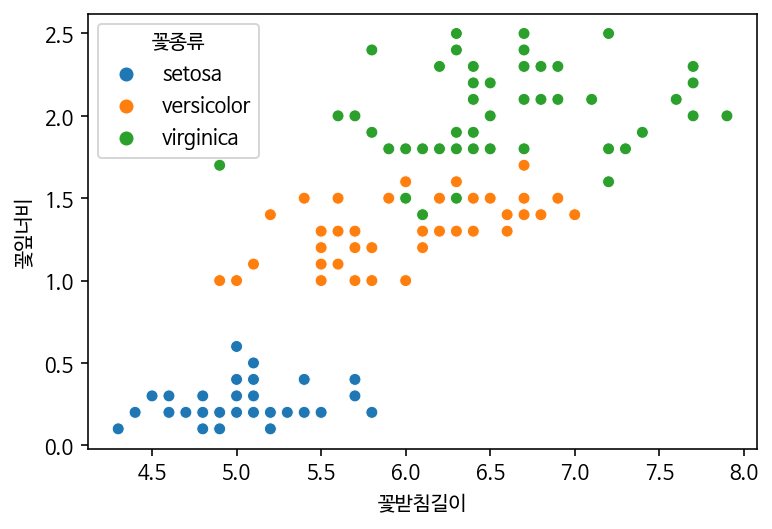

In [19]:
sns.scatterplot(x="꽃받침길이",y="꽃잎너비",data=df, hue="꽃종류")
plt.show()

- relplot
    - lineplot 과 scatterplot 모두 그릴 수 있다.

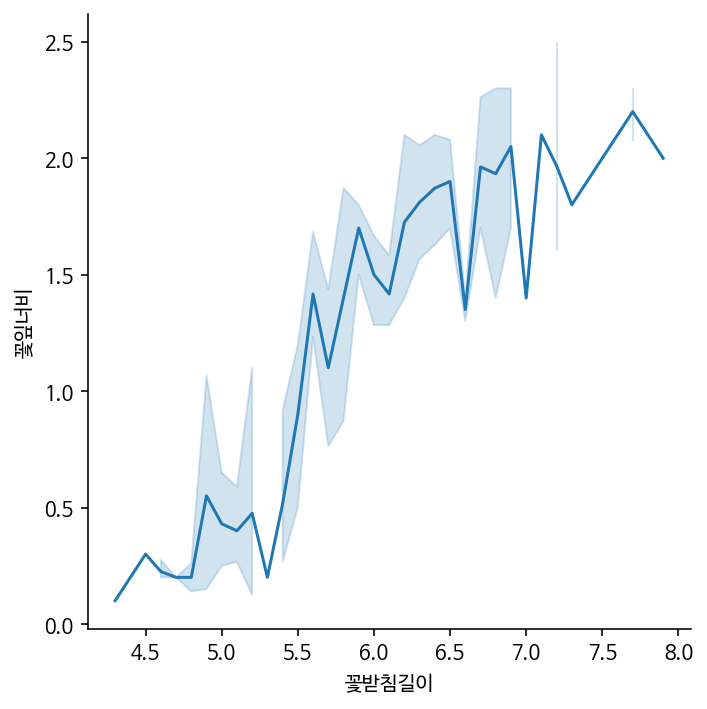

In [21]:
sns.relplot(x="꽃받침길이",y="꽃잎너비",data = df,kind = "line") # kind 값에 따라 그래프가 달라지게 나온다.
plt.show() # hue 사용이 안된다.

- col 아규먼트는 열, row 아규먼트는 행

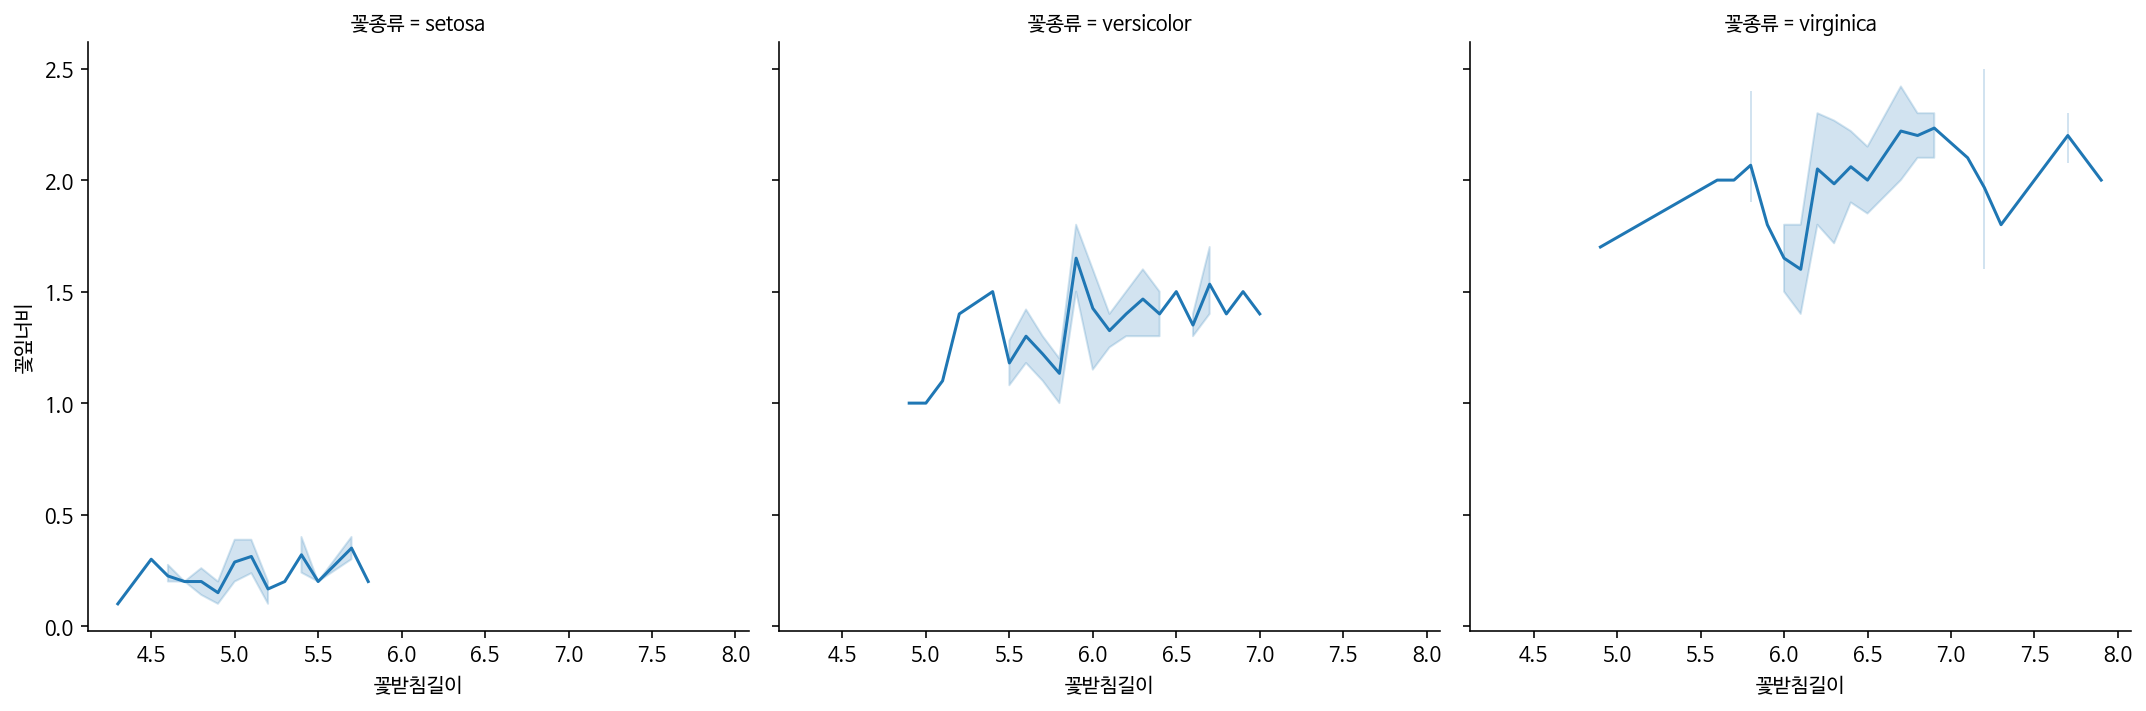

In [25]:
sns.relplot(x="꽃받침길이",y="꽃잎너비",kind="line", data=df, col="꽃종류") # row 시 행으로 나온다!
plt.show()

- lmplot
    - 추정회귀선과 산점도를 그린다.
    - 추정회귀선이란 x에 따른 y값의 변화를 잘 설명하는 직선

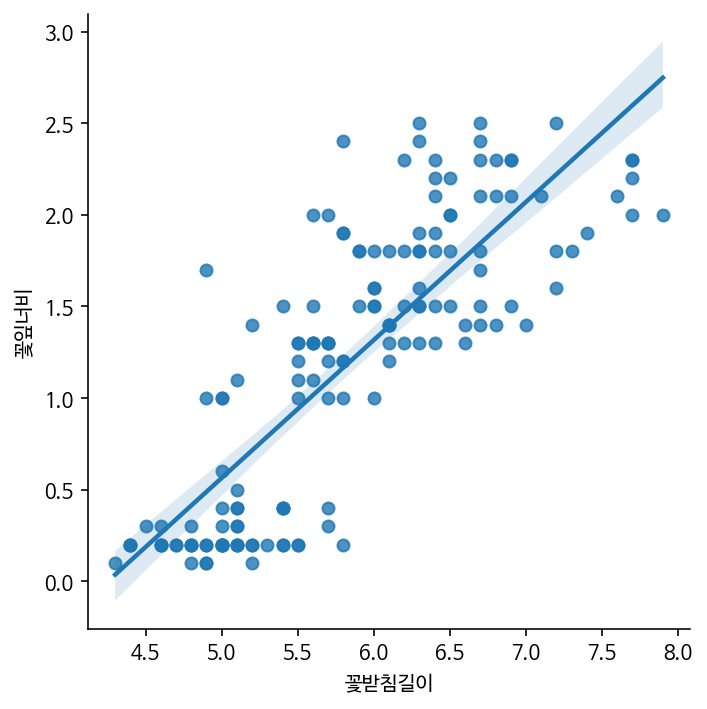

In [28]:
sns.lmplot(x="꽃받침길이", y="꽃잎너비", data=df)
plt.show()

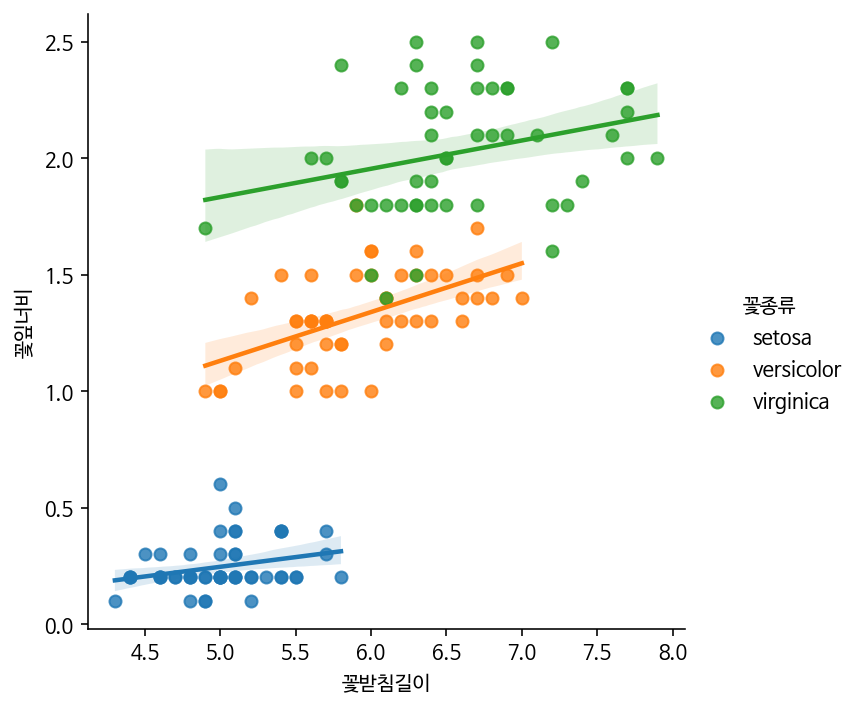

In [29]:
sns.lmplot(x="꽃받침길이", y="꽃잎너비", data=df,hue="꽃종류")
plt.show()

# heatmap

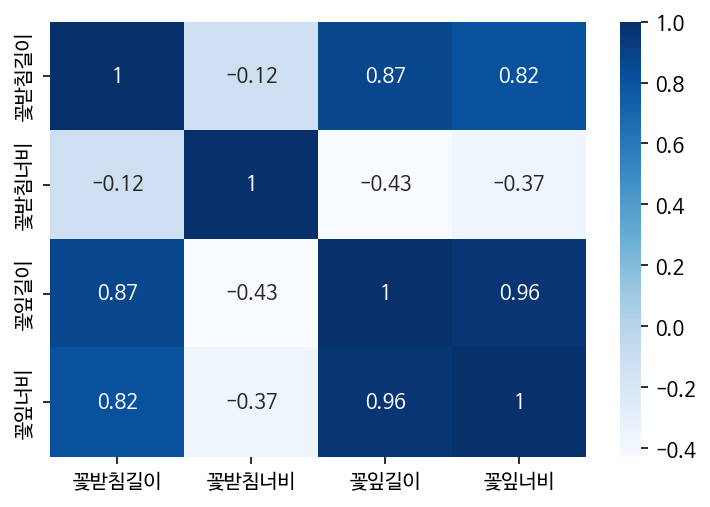

In [32]:
sns.heatmap(df.corr(),annot=True,cmap="Blues") # corr 상관계수 나타내는 것
plt.show()

- pairplot
    - 대각선 방향으로 히스토그램을 나타낸다.
    - 서로 다른 두 변수간의 산점도를 그린다.

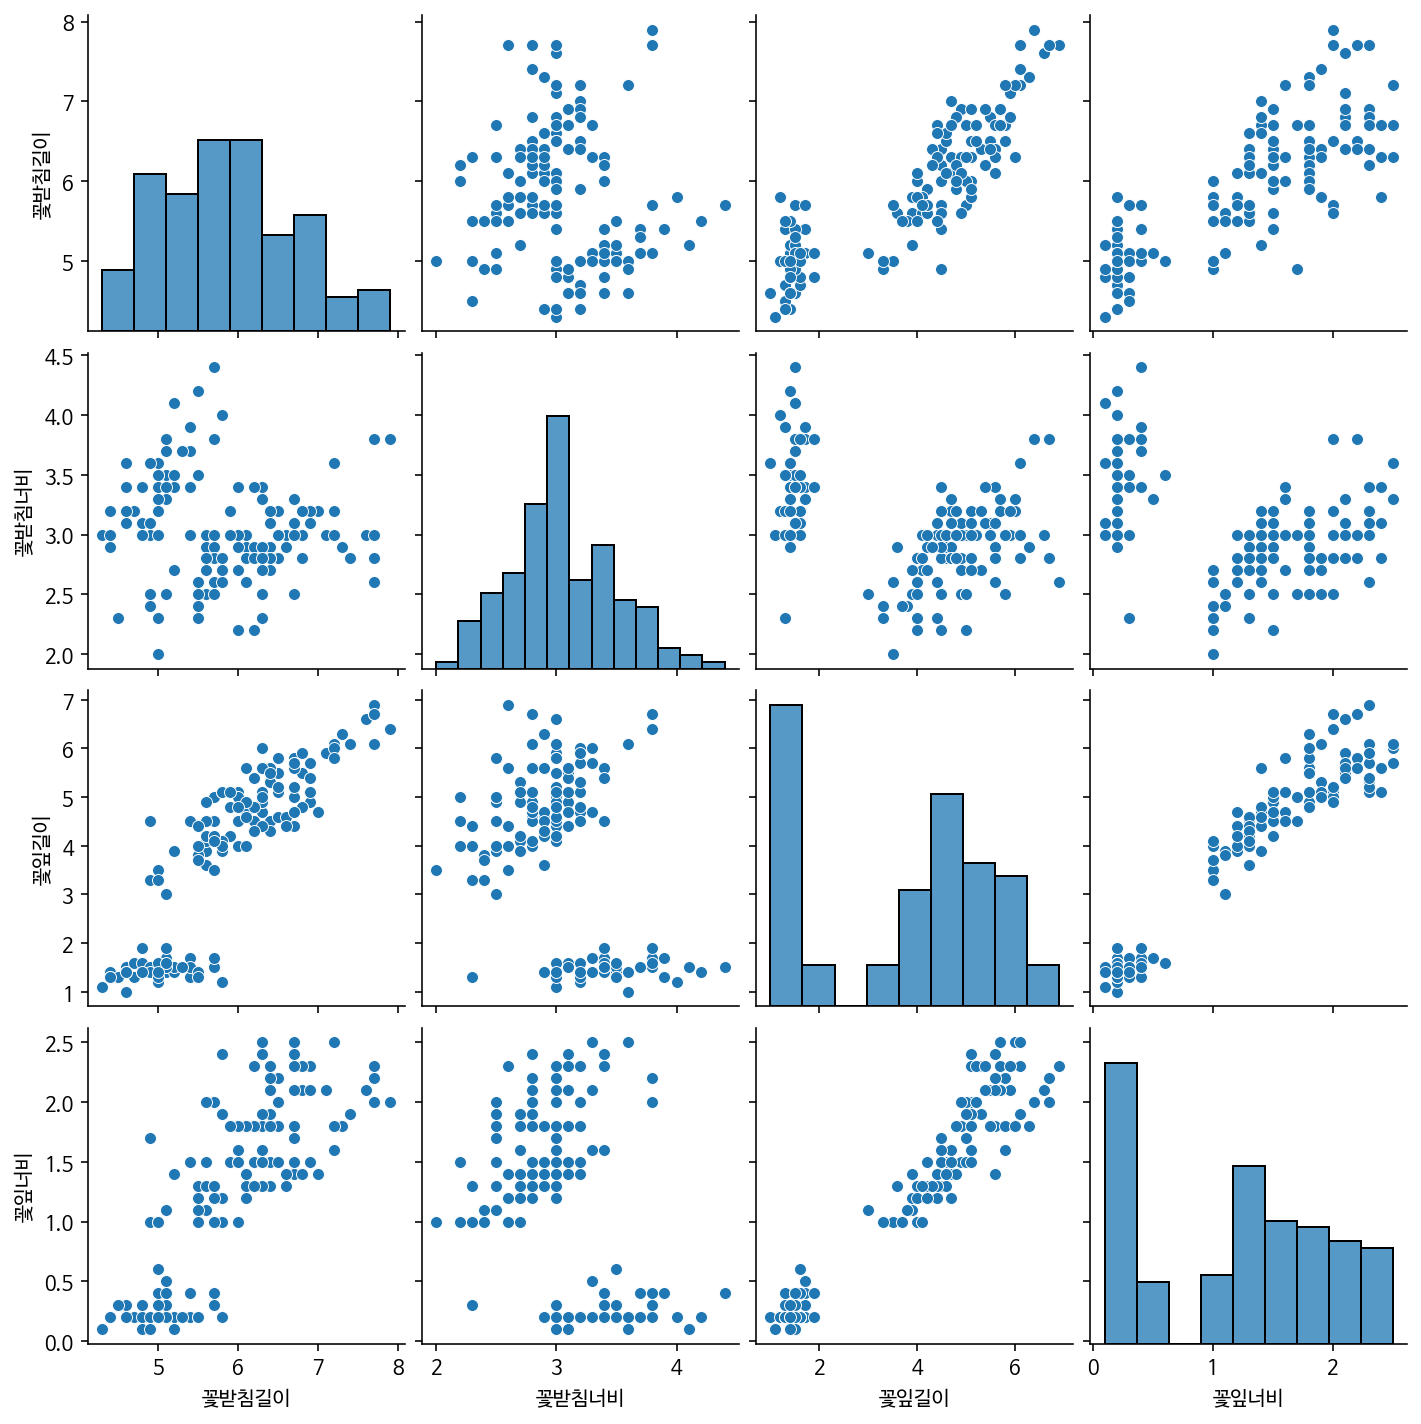

In [35]:
sns.pairplot(data=df)
plt.show()

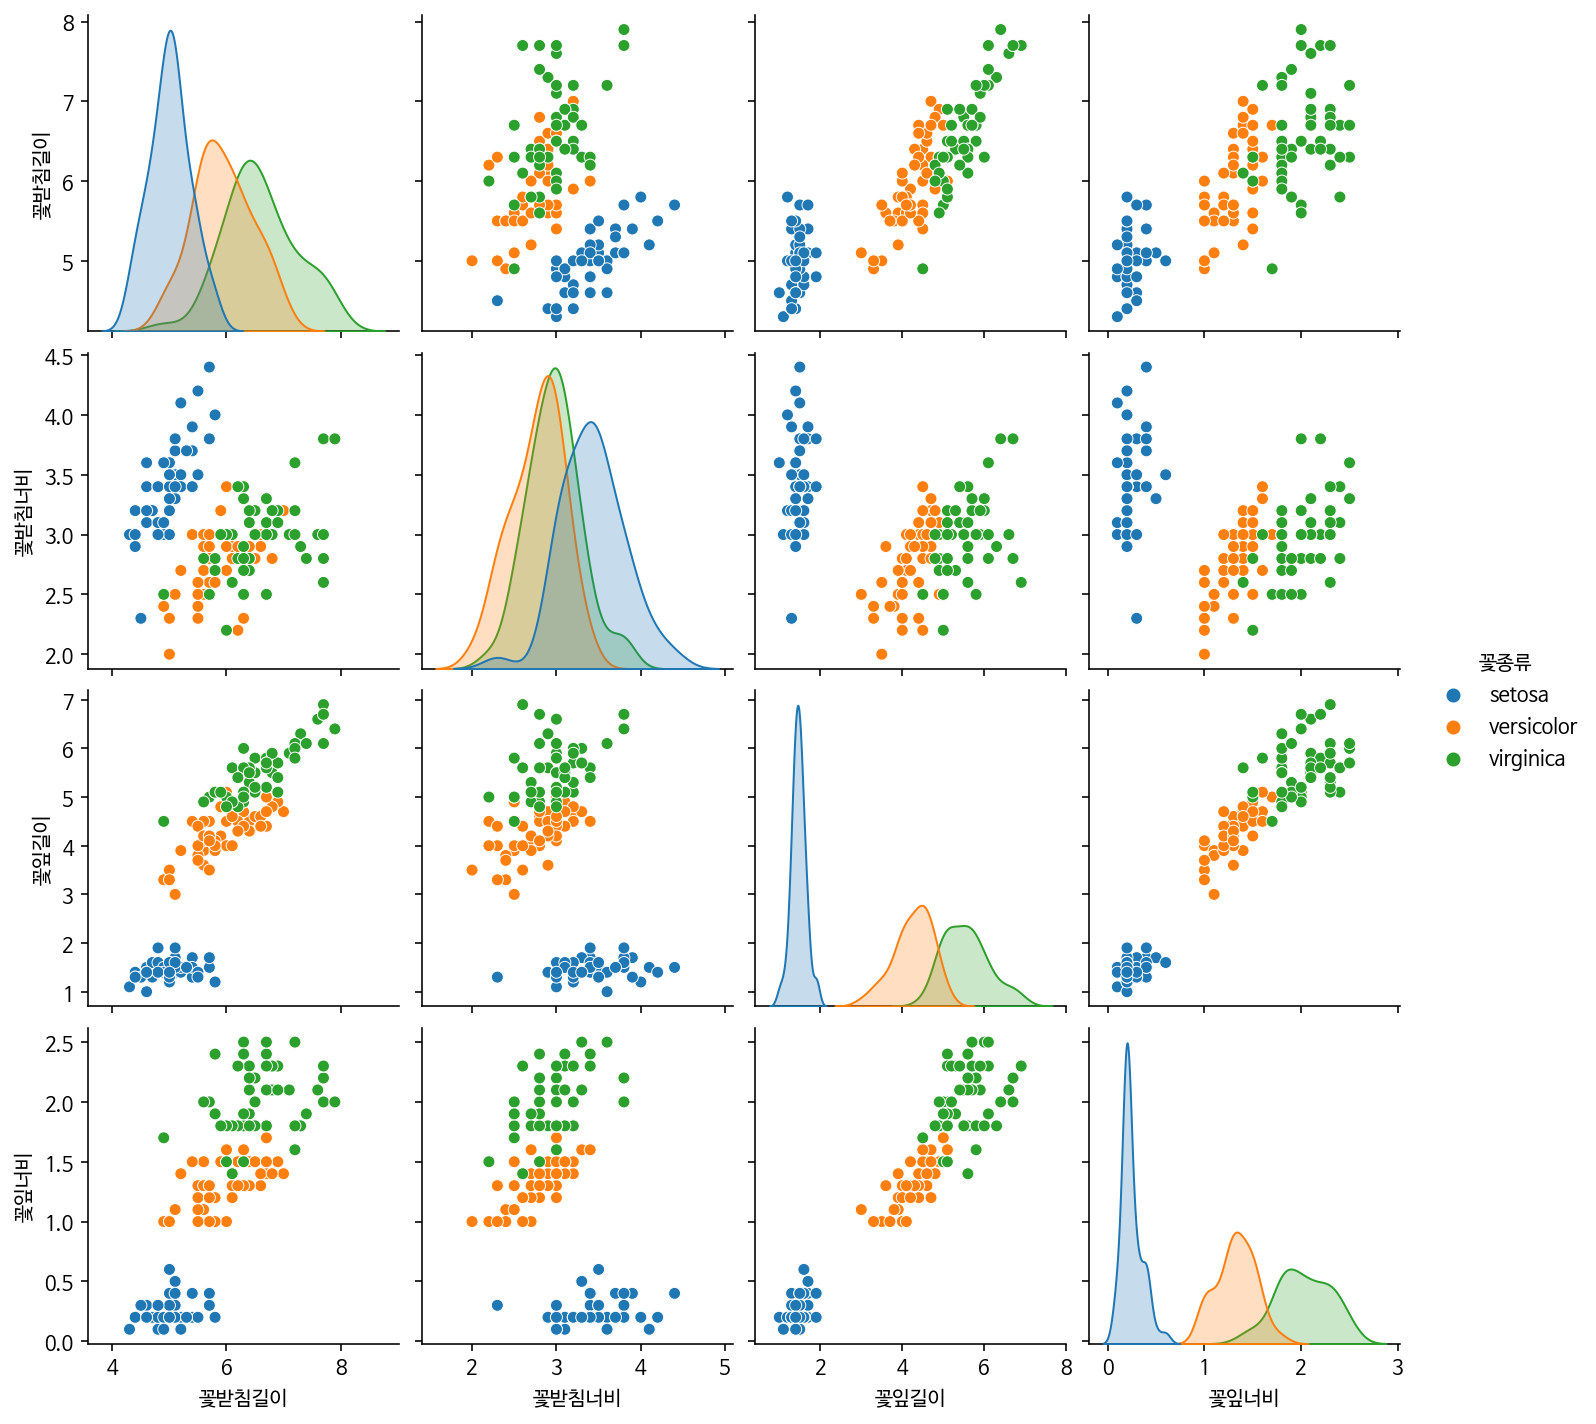

In [36]:
sns.pairplot(data=df,hue="꽃종류")
plt.show()

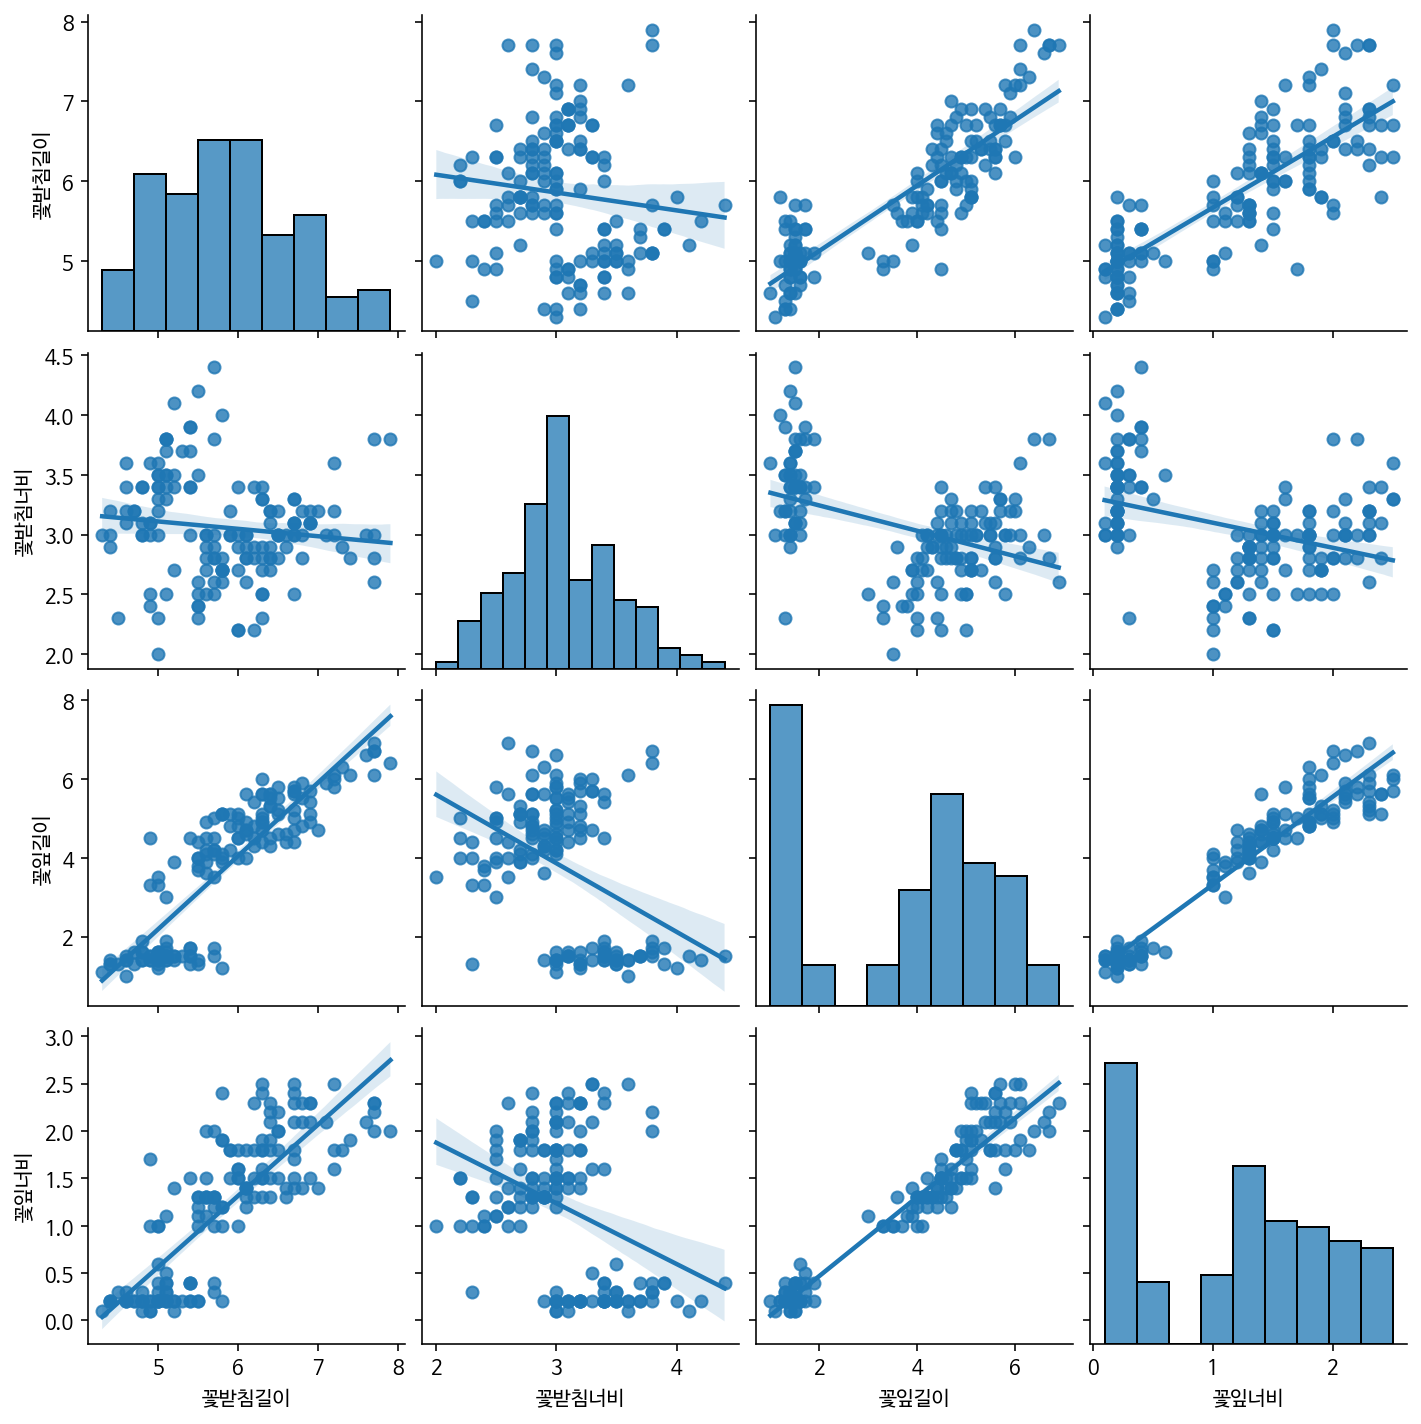

In [38]:
sns.pairplot(data=df,kind="reg") # reg = 추정회귀선
plt.show()

## Distribution plots

- distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


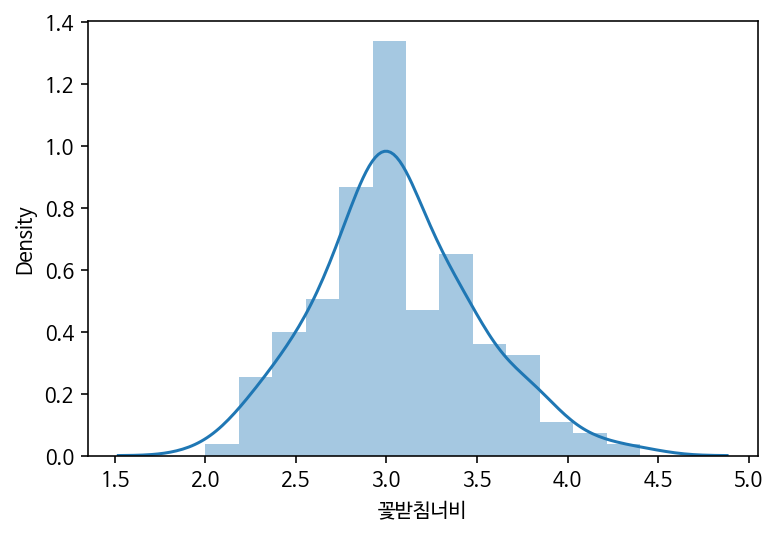

In [42]:
sns.distplot(df["꽃받침너비"])
plt.show()

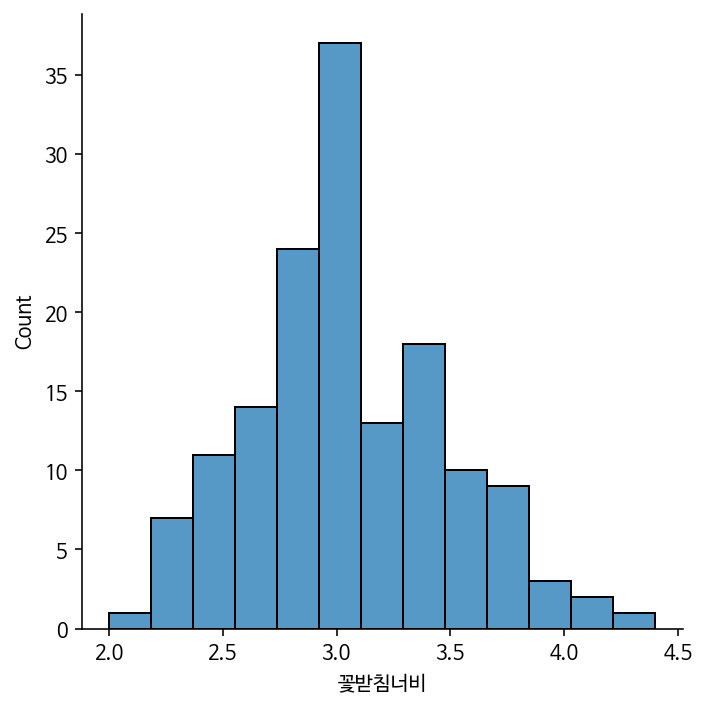

In [46]:
sns.displot(df["꽃받침너비"]) # kind="kde"
plt.show()

- kdeplot

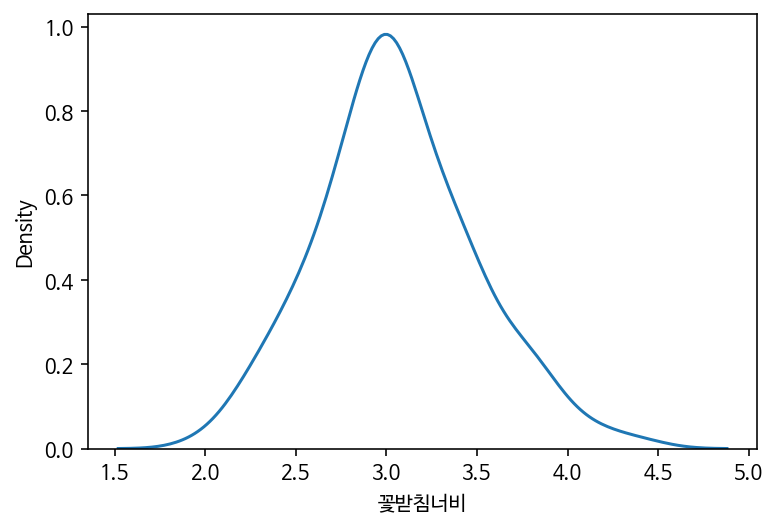

In [47]:
sns.kdeplot(df["꽃받침너비"]) # 정규분포인지 파악하기 위해 씀!
plt.show()

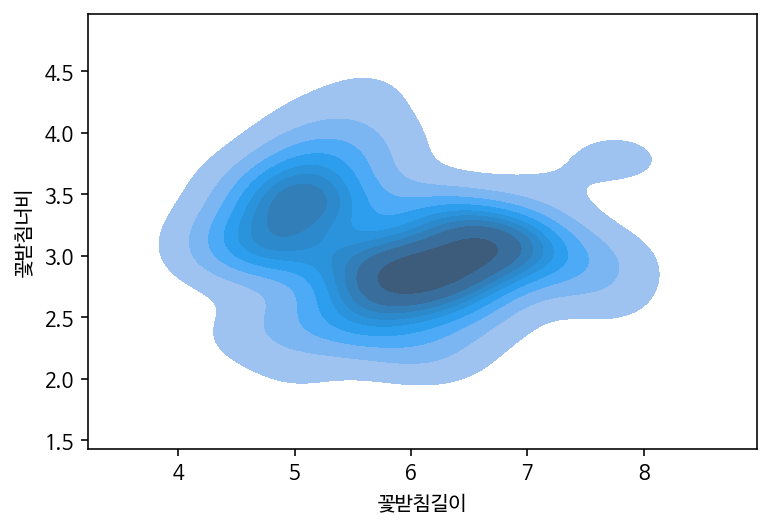

In [52]:
sns.kdeplot(x="꽃받침길이", y="꽃받침너비",data=df,shade=True) # shade = 음영효과
plt.show()

## Categorical

In [54]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
cols_rename = {
    "survived" : "생존여부",
    "pclass" : "티켓등급",
    "sex" : "성별",
    "age":"나이",
    "sibsp":"형제자매_배우자수",
    "parch":"부모_자식수",
    "fare": "운임",
    "embarked" : "탑승항구"
}
df = df.rename(columns = cols_rename)
df.head()

,생존여부,티켓등급,성별,나이,형제자매_배우자수,부모_자식수,운임,탑승항구,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- countplot

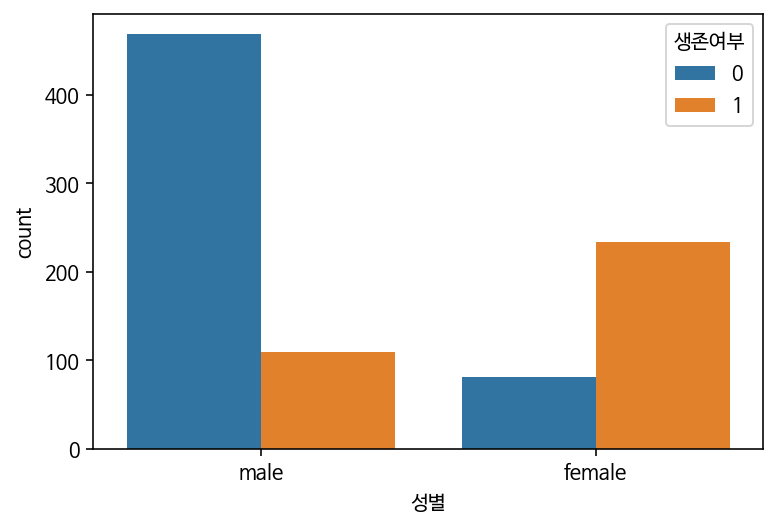

In [57]:
# 성별로 생존여부 카운팅!!
sns.countplot(x="성별",hue="생존여부",data=df)
plt.show()

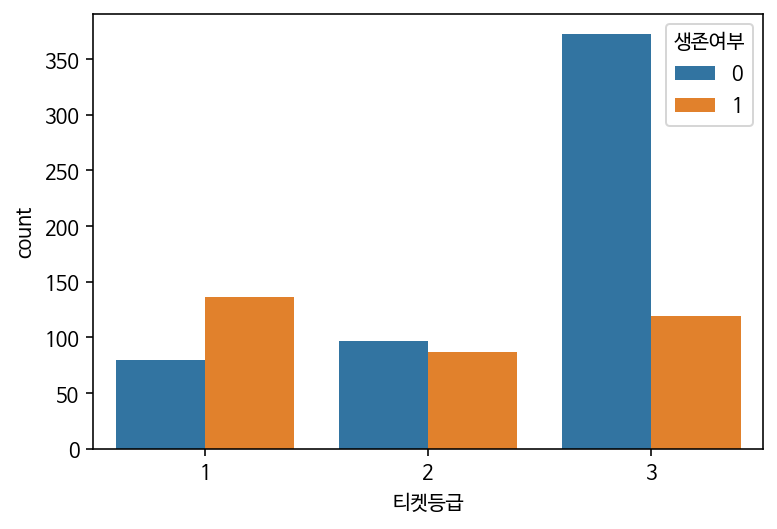

In [60]:
# 티켓등급별 생존여부 카운팅
sns.countplot(x="티켓등급",hue='생존여부',data=df)
plt.show()

- barplot
    - x(범주형)에 대한 y(수치형)의 통계치를 bar형태로 시각화
    - 신뢰구간도 표시!!

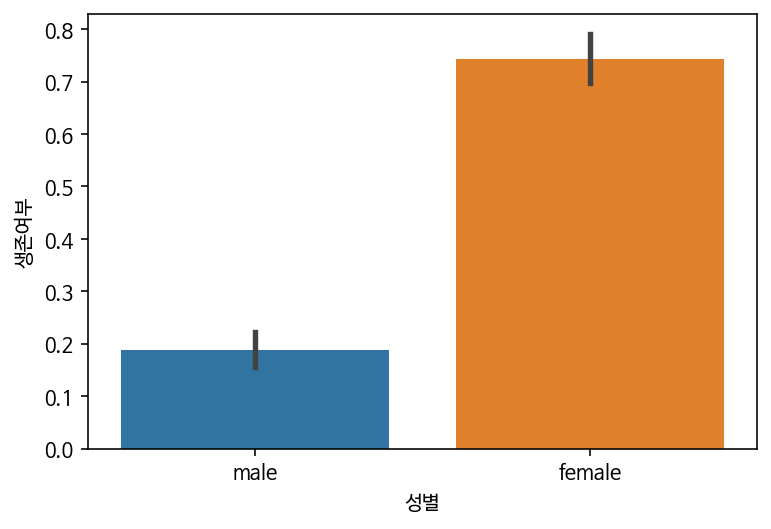

In [61]:
# 성별 생존 비율(수치에 대해서 평균)을 보고싶다면?
sns.barplot(x="성별",y="생존여부",data=df) # 기본값이 평균이라 비율이 나옴
plt.show()

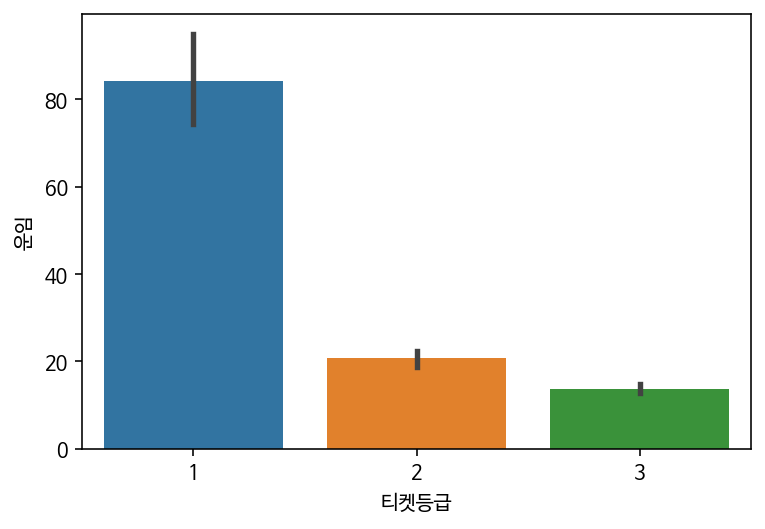

In [62]:
# 티켓등급별로 운임료의 평균
sns.barplot(x="티켓등급",y="운임",data=df)
plt.show()

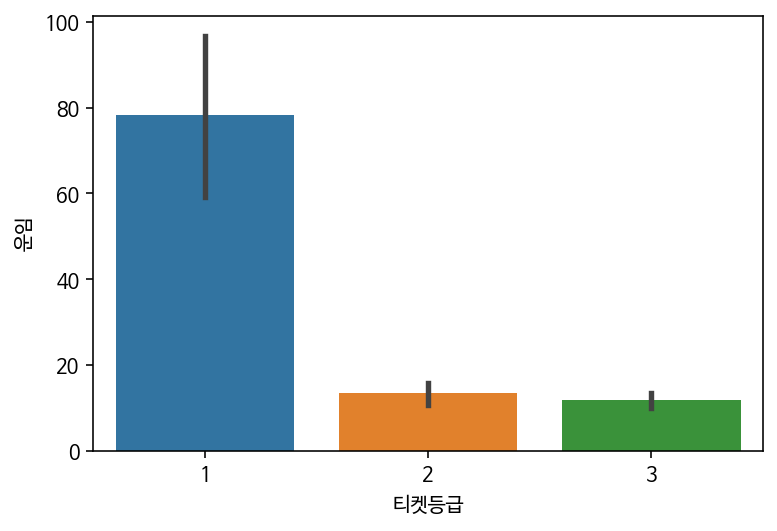

In [64]:
# 티켓등급별로 운임료의 표준편차를 보고싶다면?
sns.barplot(x="티켓등급",y="운임",data=df,estimator=np.std)
plt.show()

- boxplot

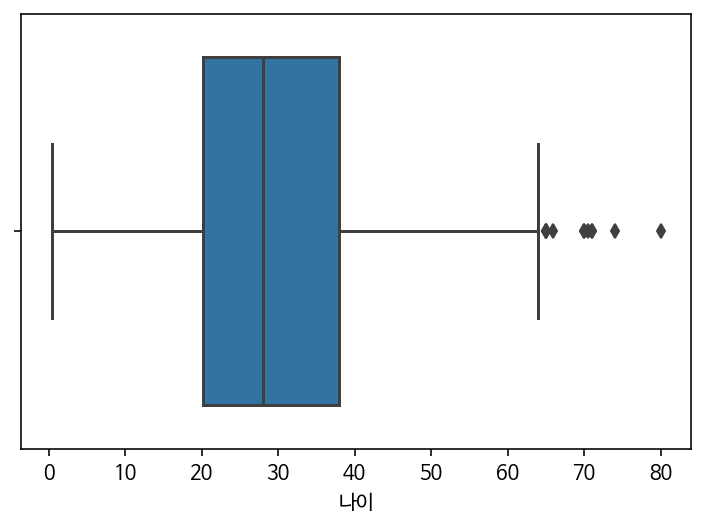

In [65]:
sns.boxplot(x="나이",data=df) # 나이가 많은 쪽에 이상치가 많음!
plt.show()

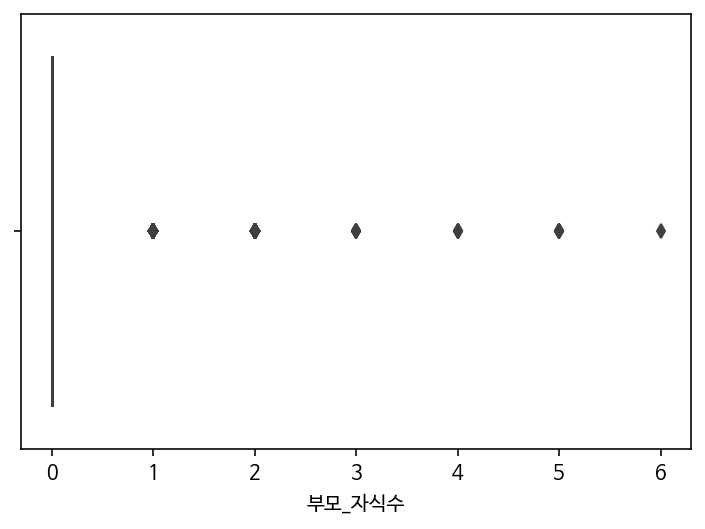

In [74]:
sns.boxplot(x="운임",data=df) # 나이가 많은 쪽에 이상치가 많음!
plt.show()

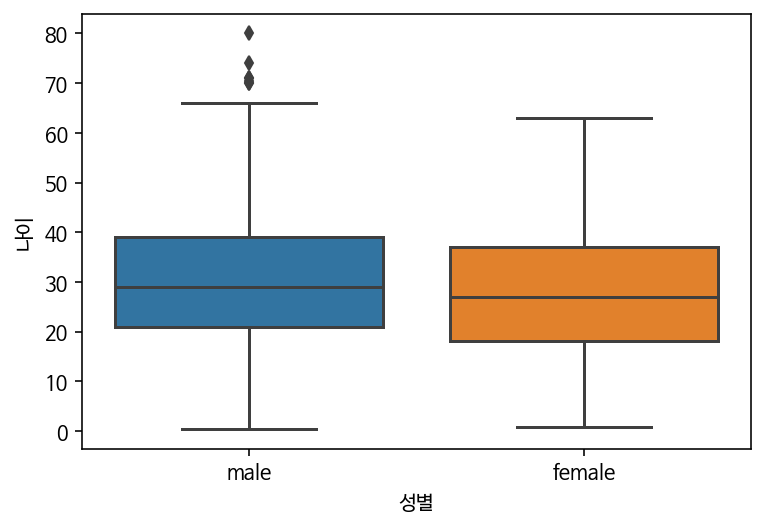

In [77]:
# 성별로 나이에 대한 boxplot을 보고 싶다면?
sns.boxplot(x="성별",y="나이",data=df) # 성별은 y를 추가해야 한다.
plt.show()

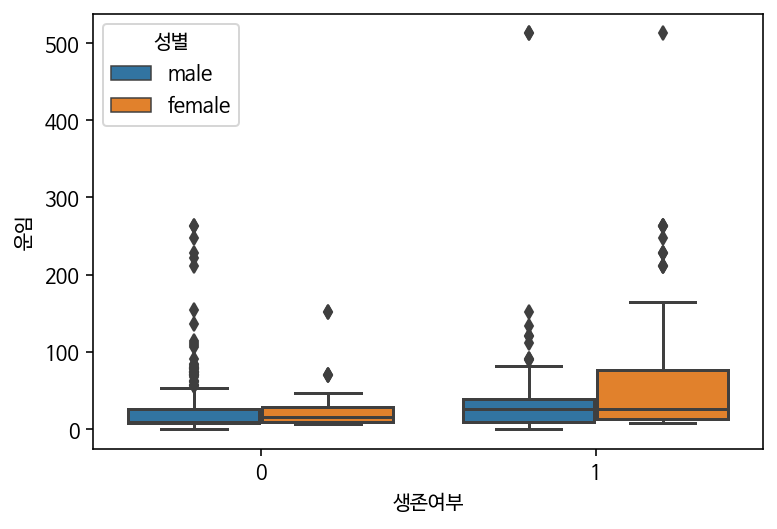

In [81]:
# 각 생존여부에 대하야 성별로 운임에 대한 boxplot을 보고 싶다면?
sns.boxplot(x = "생존여부", hue = "성별", y = "운임",data=df) # 성별은 y를 추가해야 한다.
plt.show()

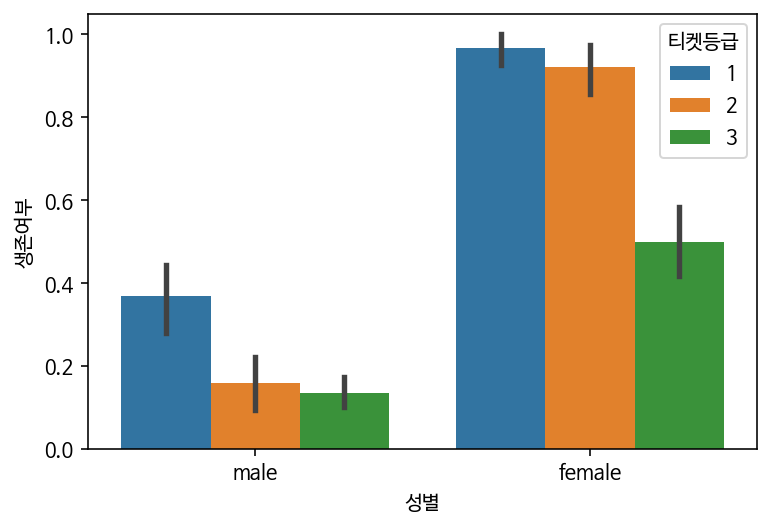

In [84]:
sns.barplot(x="성별",hue="티켓등급",y="생존여부",data=df)
plt.show()

# plotly => 발표용 (프로틀리)
https://plotly.com/python/